# 다중 숫자 순차열 데이터 다중 예측 Template


# 데이터 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 기반 숫자열 생성

In [2]:
numbers = np.zeros((2000,2))
numbers[:,0] = np.sin(np.arange(0,1000,0.5))
numbers[:,1] = np.cos(np.arange(0,1000,0.5))

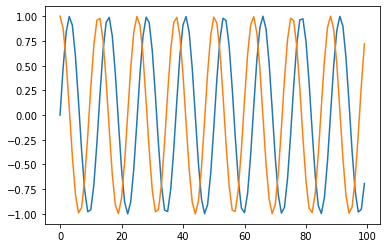

In [3]:
plt.plot(numbers[:100,0])
plt.plot(numbers[:100,1])
plt.show()

In [4]:
SEQUENCE_LENGTH = 5
OFFSET = 1

## 입출력 데이터 생성

[12345678901234567890, 34567890123456789012]의 숫자열 2개로 다음의 입출력 데이터를 생성한다.
```
[12345, 34567] -> [6, 8]
[23456, 45678] -> [7, 9]
[34567, 56789] -> [8, 0]
...
[56789, 78901] -> [0, 2]
```

In [5]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x0>   = [3:8] = 45678
#                      y  = [8]   = 9
# numbers[1] = 34567890123456789012
#                 i = 3
#                 <-x1>   = [3:8] = 67890
#                      y  = [8]   = 1



In [6]:
print(len(raw_x))
# len(raw_x) = 1994 = len(numbers) - SEQUENCE_LENGTH - OFFSET = 2000 - 5 - 1

1994


## 데이터를 2차원 벡터화 하기

RNN은 2차원 입력을 전제로 한다. 다중 숫자열은 그 자체로 2차원 데이터이다. 따로 해줄 것은 없다.


In [7]:
print(raw_x[0])

[[ 0.          1.        ]
 [ 0.47942554  0.87758256]
 [ 0.84147098  0.54030231]
 [ 0.99749499  0.0707372 ]
 [ 0.90929743 -0.41614684]]


In [8]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

split_at = int(len(x)*0.9)
(train_x, test_x) = x[:split_at], x[split_at:]
(train_y, test_y) = y[:split_at], y[split_at:]

print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(1994, 5, 2)
(1994, 2)
Training Data:
(1794, 5, 2)
(1794, 2)
Test Data:
(200, 5, 2)
(200, 2)


준비된 데이터는 다음과 같습니다.

train_x[0]
 [[ 0.          1.        ]
 [ 0.47942554  0.87758256]
 [ 0.84147098  0.54030231]
 [ 0.99749499  0.0707372 ]
 [ 0.90929743 -0.41614684]]

train_y[0]
 [ 0.59847214 -0.80114362]


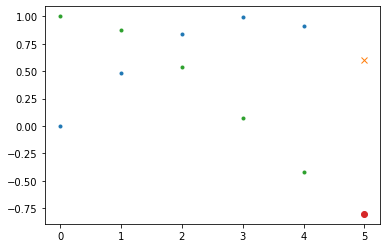

In [9]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.')
plt.plot([len(train_x[0])], train_y[0,0], 'x')
plt.plot(train_x[0].T[1], '.')
plt.plot([len(train_x[0])], train_y[0,1], 'o')

plt.show()

# Template

## LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               67072     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 67,330
Trainable params: 67,330
Non-trainable params: 0
_________________________________________________________________


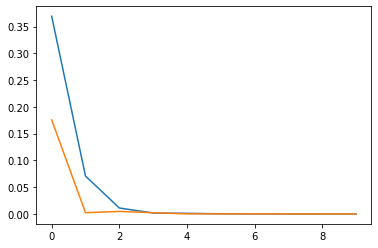

7/7 [==============================] - 0s 3ms/step - loss: 8.6638e-07 - mae: 7.8594e-04
loss= 8.663815265208541e-07
mae= 0.0007859373581595719


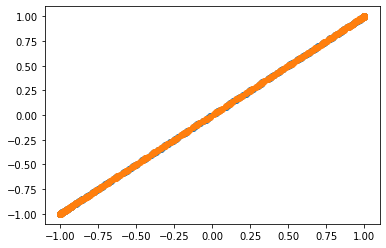

In [10]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x).squeeze()
plt.scatter(test_y[:,0], y_[:,0])
plt.scatter(test_y[:,1], y_[:,1])
plt.show()

## GRU

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50688     
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 50,946
Trainable params: 50,946
Non-trainable params: 0
_________________________________________________________________


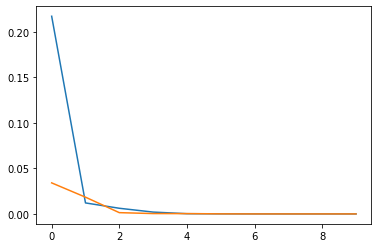

7/7 [==============================] - 0s 2ms/step - loss: 3.4787e-07 - mae: 5.1434e-04
loss= 3.4786637570505263e-07
mae= 0.000514343730174005


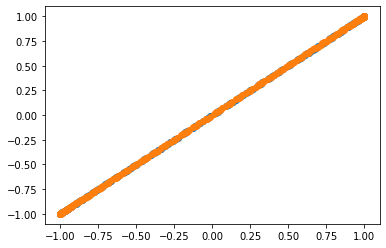

In [11]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(GRU(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x).squeeze()
plt.scatter(test_y[:,0], y_[:,0])
plt.scatter(test_y[:,1], y_[:,1])
plt.show()

## Bidirectional + LSTM

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               134144    
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 134,658
Trainable params: 134,658
Non-trainable params: 0
_________________________________________________________________


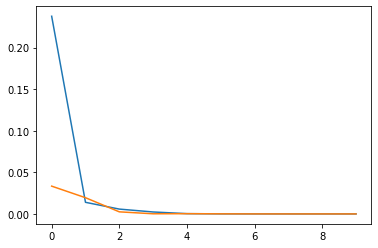

7/7 [==============================] - 0s 3ms/step - loss: 2.1162e-07 - mae: 3.8830e-04
loss= 2.116204456115156e-07
mae= 0.000388302345527336


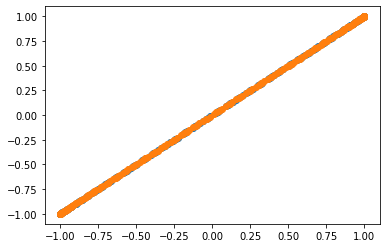

In [12]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(Bidirectional(LSTM(128), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x).squeeze()
plt.scatter(test_y[:,0], y_[:,0])
plt.scatter(test_y[:,1], y_[:,1])
plt.show()

## Bidirectional + GRU

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 256)               101376    
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 101,890
Trainable params: 101,890
Non-trainable params: 0
_________________________________________________________________


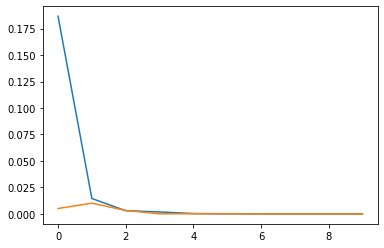

7/7 [==============================] - 0s 3ms/step - loss: 1.0940e-07 - mae: 2.4677e-04
loss= 1.0939771755147376e-07
mae= 0.0002467654412612319


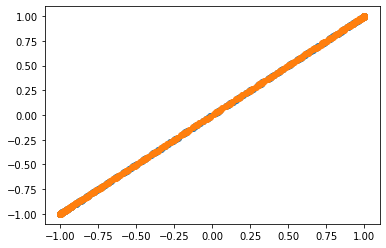

In [13]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(Bidirectional(GRU(128), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x).squeeze()
plt.scatter(test_y[:,0], y_[:,0])
plt.scatter(test_y[:,1], y_[:,1])
plt.show()

## stacked

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 128)            67072     
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 198,914
Trainable params: 198,914
Non-trainable params: 0
_________________________________________________________________


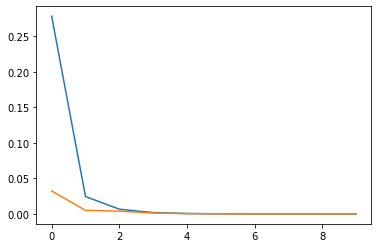

7/7 [==============================] - 0s 3ms/step - loss: 2.7671e-06 - mae: 0.0013
loss= 2.7671333100443007e-06
mae= 0.0013432529522106051


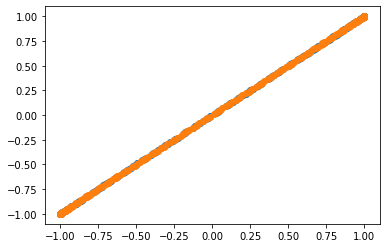

In [14]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(2))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x).squeeze()
plt.scatter(test_y[:,0], y_[:,0])
plt.scatter(test_y[:,1], y_[:,1])
plt.show()